In [2]:
import pandas as pd
from sqlalchemy import create_engine

# Database credentials
DB_USER = "postgres"
DB_PASS = "yhai3ia8Do!"
DB_HOST = "localhost"
DB_PORT = "5432"
DB_NAME = "german_housing_db"

# Connect to PostgreSQL
engine = create_engine(f"postgresql+psycopg2://{DB_USER}:{DB_PASS}@{DB_HOST}:{DB_PORT}/{DB_NAME}")

# Load data from the table
query = "SELECT * FROM german_rent_data;"
df = pd.read_sql(query, engine)

print(f"Loaded {len(df)} rows and {len(df.columns)} columns.")
df.head()


Loaded 268850 rows and 49 columns.


,regio1,servicecharge,heatingtype,telekomtvoffer,telekomhybriduploadspeed,newlyconst,balcony,picturecount,pricetrend,telekomuploadspeed,...,regio2,regio3,description,facilities,heatingcosts,energyefficiencyclass,lastrefurbish,electricitybaseprice,electricitykwhprice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,None,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,None,NaN,None,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,None,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,None,87.23,None,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,None,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,None,NaN,NaN,NaN,Feb20


In [14]:
df.to_csv("cleaned_rent_data.csv", index=False)


In [4]:
# List of columns
df.columns.tolist()

['regio1',
 'servicecharge',
 'heatingtype',
 'telekomtvoffer',
 'telekomhybriduploadspeed',
 'newlyconst',
 'balcony',
 'picturecount',
 'pricetrend',
 'telekomuploadspeed',
 'totalrent',
 'yearconstructed',
 'scoutid',
 'noparkspaces',
 'firingtypes',
 'haskitchen',
 'geo_bln',
 'cellar',
 'yearconstructedrange',
 'baserent',
 'housenumber',
 'livingspace',
 'geo_krs',
 'condition',
 'interiorqual',
 'petsallowed',
 'street',
 'streetplain',
 'lift',
 'baserentrange',
 'typeofflat',
 'geo_plz',
 'norooms',
 'thermalchar',
 'floor',
 'numberoffloors',
 'noroomsrange',
 'garden',
 'livingspacerange',
 'regio2',
 'regio3',
 'description',
 'facilities',
 'heatingcosts',
 'energyefficiencyclass',
 'lastrefurbish',
 'electricitybaseprice',
 'electricitykwhprice',
 'date']

In [5]:
# Overview of data
df.info()
df.describe(include='all')

# Check missing values
df.isna().sum().sort_values(ascending=False).head(15)




numeric_cols = [
'regio1',
 'servicecharge',
 'heatingtype',
 'telekomtvoffer',
 'telekomhybriduploadspeed',
 'newlyconst',
 'balcony',
 'picturecount',
 'pricetrend',
 'telekomuploadspeed',
 'totalrent',
 'yearconstructed',
 'scoutid',
 'noparkspaces',
 'firingtypes',
 'haskitchen',
 'cellar',
 'yearconstructedrange',
 'baserent',
 'housenumber',
 'livingspace',
 'geo_krs',
 'condition',
 'interiorqual',
 'petsallowed',
 'street',
 'streetplain',
 'lift',
 'baserentrange',
 'typeofflat',
 'geo_plz',
 'norooms',
 'thermalchar',
 'floor',
 'numberoffloors',
 'noroomsrange',
 'garden',
 'livingspacerange',
 'regio2',
 'regio3',
 'description',
 'facilities',
 'heatingcosts',
 'energyefficiencyclass',
 'lastrefurbish',
 'electricitybaseprice',
 'electricitykwhprice',
 'date'
 ]


for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   servicecharge             261941 non-null  float64
 2   heatingtype               223994 non-null  object 
 3   telekomtvoffer            236231 non-null  object 
 4   telekomhybriduploadspeed  45020 non-null   float64
 5   newlyconst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomuploadspeed        235492 non-null  float64
 10  totalrent                 228333 non-null  float64
 11  yearconstructed           211805 non-null  float64
 12  scoutid                   268850 non-null  int64  
 13  noparkspaces              93052 non-null   f

In [6]:
# Summary statistics for numeric columns
df[numeric_cols].describe()

# Filter out unrealistic total rent values
df = df[df["totalrent"].between(100, 3000)]


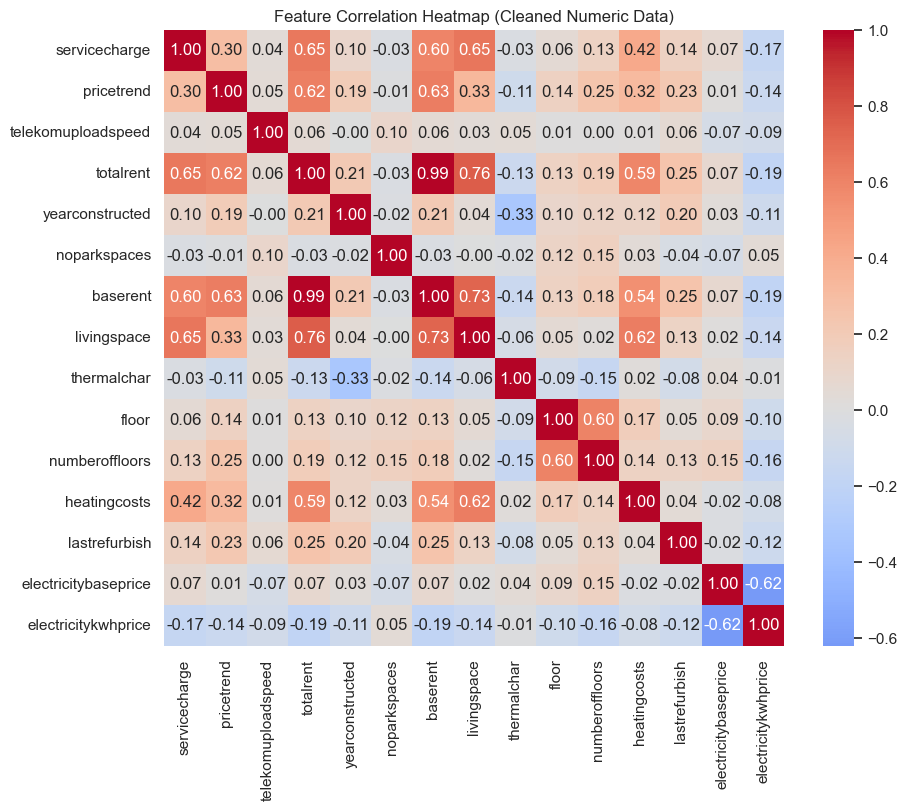

In [8]:
numeric_cols_new = [
    'servicecharge',
    'pricetrend',
    'telekomuploadspeed',
    'totalrent',
    'yearconstructed',
    'noparkspaces',
    'baserent',
    'livingspace',
    'thermalchar',
    'floor',
    'numberoffloors',
    'heatingcosts',
    'lastrefurbish',
    'electricitybaseprice',
    'electricitykwhprice'
]


# Keep only selected numeric columns that actually exist in your DataFrame
numeric_cols_new = [c for c in numeric_cols_new if c in df.columns]

numeric_df = df[numeric_cols_new].copy()

# Drop columns that are mostly empty (e.g., < 10% valid data)
numeric_df = numeric_df.dropna(axis=1, thresh=len(df)*0.1)

# Optionally drop rows with too many NaN
numeric_df = numeric_df.dropna(axis=0, how='any')

import seaborn as sns
import matplotlib.pyplot as plt

corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap (Cleaned Numeric Data)")
plt.show()




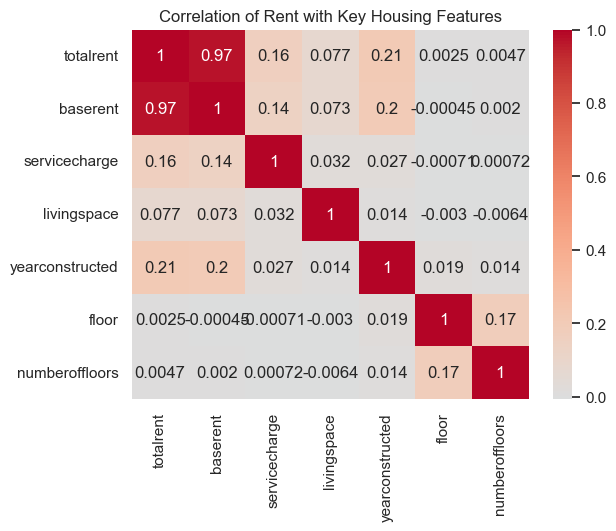

In [9]:
key_cols = ['totalrent', 'baserent', 'servicecharge', 'livingspace', 'yearconstructed', 'floor', 'numberoffloors']
sns.heatmap(df[key_cols].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of Rent with Key Housing Features")
plt.show()


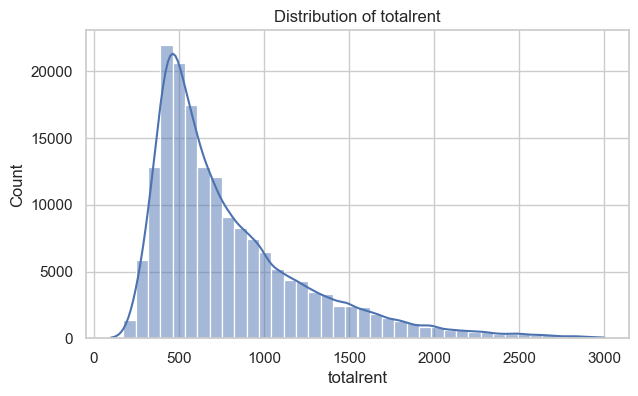

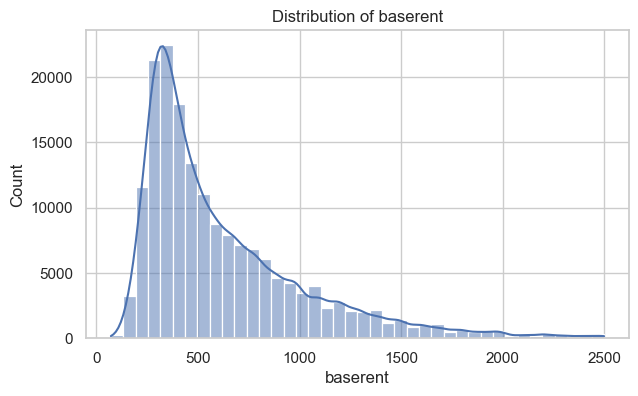

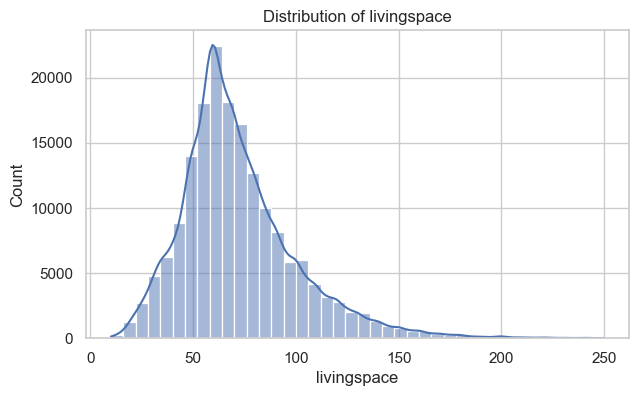

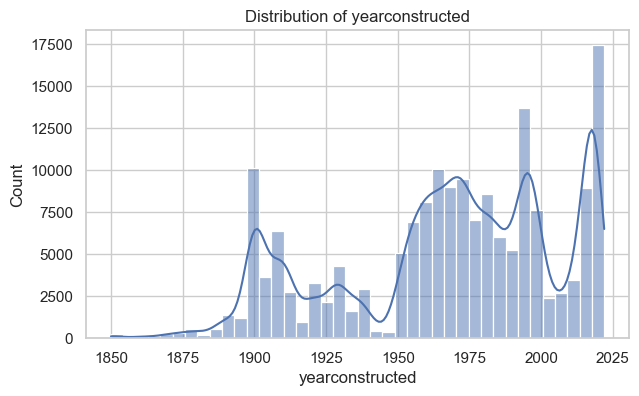

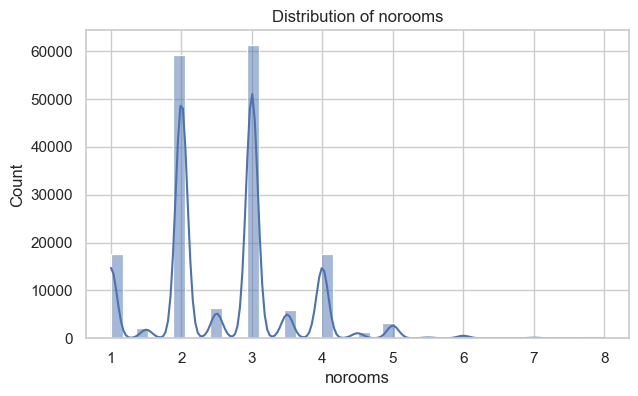

In [10]:
cols_to_plot = ["totalrent", "baserent", "livingspace", "yearconstructed", "norooms"]

for col in cols_to_plot:
    df[col] = pd.to_numeric(df[col], errors="coerce")


# Remove insane values
df = df[df["totalrent"].between(100, 3000)]
df = df[df["baserent"].between(50, 2500)]
df = df[df["livingspace"].between(10, 250)]   # in m²
df = df[df["norooms"].between(1, 8)]
df = df[df["yearconstructed"].between(1850, 2025)]




for col in ["totalrent", "baserent", "livingspace", "yearconstructed", "norooms"]:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], bins=40, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()






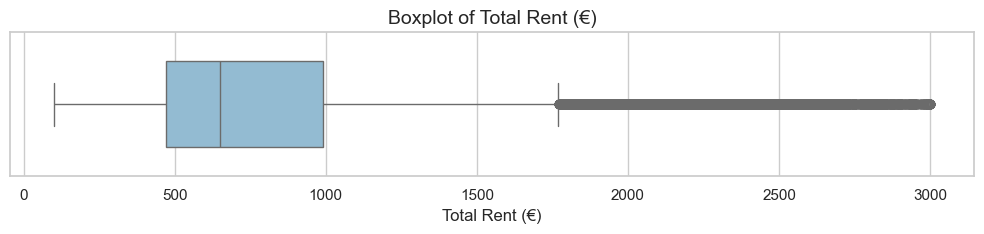

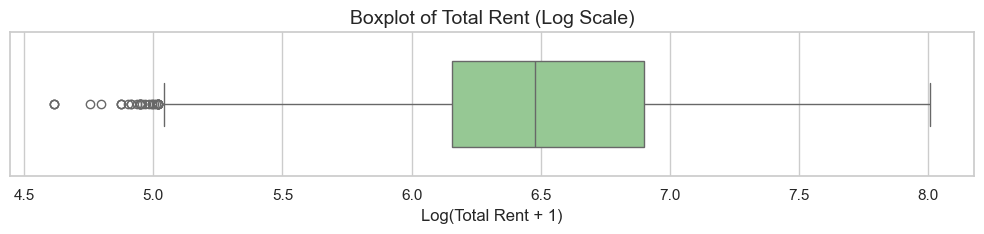

In [11]:

import numpy as np

# Boxplot of Total Rent
plt.figure(figsize=(10, 2.5))
sns.boxplot(
    x=df["totalrent"],
    width=0.6,
    color=sns.color_palette("Blues")[2]
)
plt.title("Boxplot of Total Rent (€)", fontsize=14)
plt.xlabel("Total Rent (€)")
plt.tight_layout()
plt.show()

# Boxplot of Total Rent (Log Scale)
plt.figure(figsize=(10, 2.5))
sns.boxplot(
    x=np.log1p(df["totalrent"].dropna()),
    width=0.6,
    color=sns.color_palette("Greens")[2]
)
plt.title("Boxplot of Total Rent (Log Scale)", fontsize=14)
plt.xlabel("Log(Total Rent + 1)")
plt.tight_layout()
plt.show()



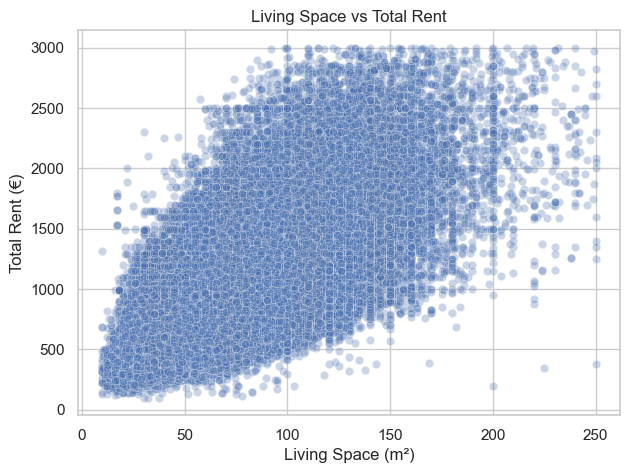

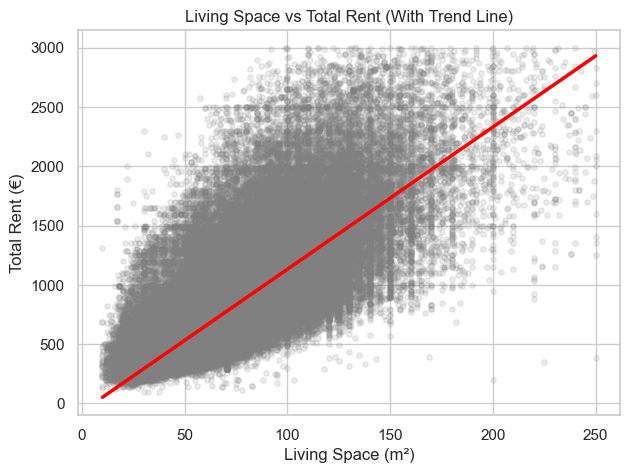

In [12]:
clean_df = df[
    df["livingspace"].between(10, 300) &
    df["totalrent"].between(100, 3000)
]


plt.figure(figsize=(7,5))
sns.scatterplot(
    x="livingspace",
    y="totalrent",
    data=clean_df,
    alpha=0.3
)
plt.title("Living Space vs Total Rent")
plt.xlabel("Living Space (m²)")
plt.ylabel("Total Rent (€)")
plt.show()


plt.figure(figsize=(7,5))
sns.regplot(
    x="livingspace",
    y="totalrent",
    data=clean_df,
    scatter_kws={"alpha":0.15, "color":"gray", "s":15},
    line_kws={"color":"red", "linewidth":2.5}
)
plt.title("Living Space vs Total Rent (With Trend Line)")
plt.xlabel("Living Space (m²)")
plt.ylabel("Total Rent (€)")
plt.show()



Average rent WITH balcony:  € 890.39
Average rent WITHOUT balcony: € 620.57

T-statistic: 135.832
P-value: 0.0

 Result: Significant difference in rent between flats with and without balconies.


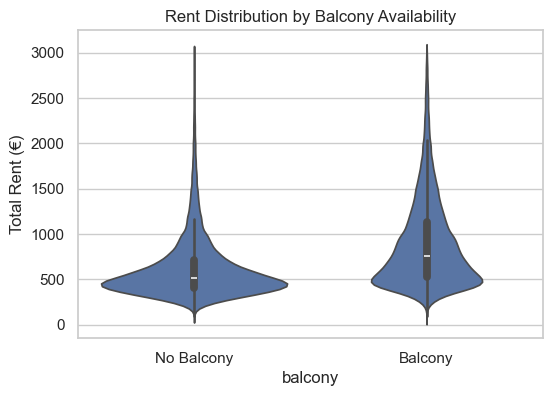

In [14]:
import scipy.stats as stats

balcony_rent = df[df["balcony"] == True]["totalrent"].dropna()
no_balcony_rent = df[df["balcony"] == False]["totalrent"].dropna()

# T-test with equal_var=False (more robust: Welch’s test)
t_stat, p_val = stats.ttest_ind(balcony_rent, no_balcony_rent, equal_var=False)

print("Average rent WITH balcony:  €", round(balcony_rent.mean(), 2))
print("Average rent WITHOUT balcony: €", round(no_balcony_rent.mean(), 2))
print("\nT-statistic:", round(t_stat, 3))
print("P-value:", p_val)

if p_val < 0.05:
    print("\n Result: Significant difference in rent between flats with and without balconies.")
else:
    print("\n Result: No statistically significant difference in rent.")

plt.figure(figsize=(6,4))
sns.violinplot(x=df["balcony"], y=df["totalrent"])
plt.xticks([0,1], ["No Balcony", "Balcony"])
plt.title("Rent Distribution by Balcony Availability")
plt.ylabel("Total Rent (€)")
plt.show()




In [32]:
df["geo_bln"].isna().sum(), df["geo_bln"].notna().sum()
df["geo_bln"].unique()

array([nan])

In [33]:
df["regio1"].unique()[:20]
df["geo_plz"].head()


0    44269
2     1097
4    28213
8    28717
9    79211
Name: geo_plz, dtype: int64

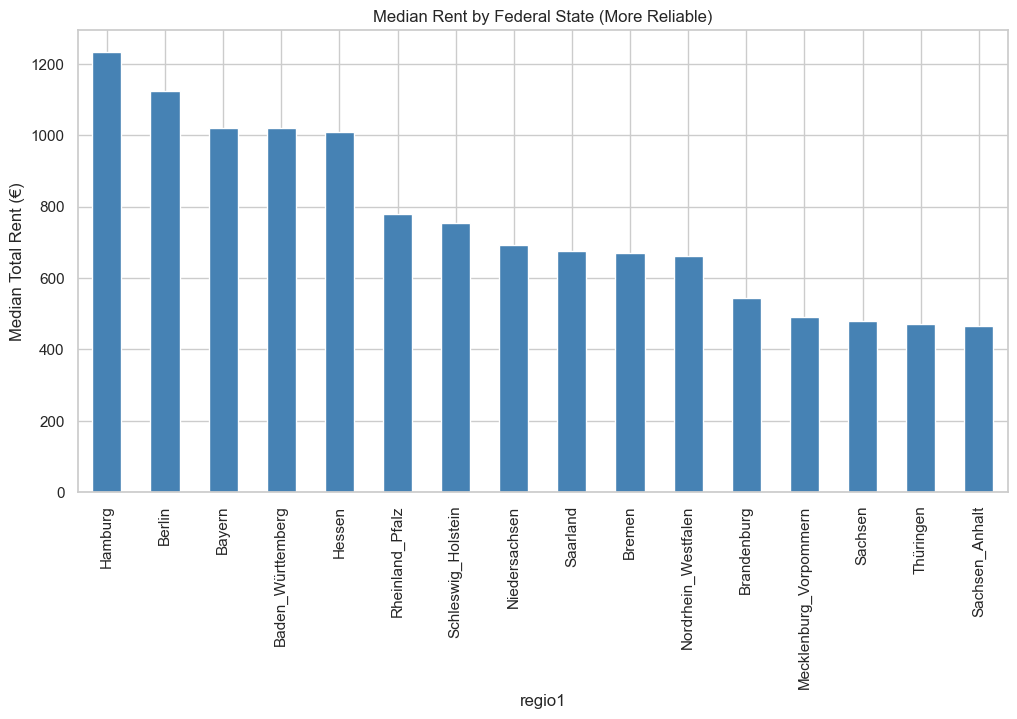

In [ ]:
df = pd.read_sql("SELECT * FROM german_rent_data;", engine)

safe_numeric_cols = [
    "totalrent", "baserent", "servicecharge",
    "livingspace", "yearconstructed", "floor",
    "numberoffloors"
]

for col in safe_numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")





state_rent = (
    df.groupby("regio1")["totalrent"]
      .median()  
      .sort_values(ascending=False)
)

plt.figure(figsize=(12,6))
state_rent.plot(kind="bar", color="steelblue")
plt.title("Median Rent by Federal State")
plt.ylabel("Median Total Rent (€)")
plt.show()
